# Clase 4: Introducción a clasificación

Temas que veremos en esta notebook:

- Introducción a Scikit-Learn
- Clasificación binaria.
- Regresión logística y función sigmoidea
- Cross entropy
- Support Vector Machines 
- K-Nearest Neighbours
- Naive Bayes
- Linear Discriminant Analysis
- Clasificación multiclase

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Fuentes:*

* https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
* https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_introduction.html
* https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb


# Introducción a Scikit-Learn

Scikit-learn es una librería de aprendizaje automático de código abierto para el lenguaje de programación Python. Proporciona herramientas simples y eficientes para el análisis de datos y la minería de datos, así como para la construcción de modelos de aprendizaje automático. Scikit-learn es una de las bibliotecas más populares para el aprendizaje automático en Python y se utiliza ampliamente en la industria y la academia. Admite librerías numéricas y científicas de Python como NumPy y SciPy, o Pandas.

![fig_sckl](https://ulhpc-tutorials.readthedocs.io/en/latest/python/advanced/scikit-learn/images/scikit.png)
*Image Source: ulhpc-tutorials.readthedocs.io*

## Ajustar un modelo y hacer predicciones

La librería esta compuesta por modulos que nos otorgan distintas herramientas desde `model_selection` que nos brinda herramientas necesarias para la manipular las particiones de los datos o `metrics` para las métricas. Por otro lado tendremos distintos módulos para cada modelo como por ejemplo `neighbors` donde encontraremos modelos que funcionan a partir de distancias como `KNN`

Debemos primero importar el modelo e instanciarlo:

```
from sklearn.MODULO import MODELO

% instanciamos el modelo definiendo sus hiperparametros
modelo = MODELO()
```

El método `fit` se llama para entrenar el modelo a partir de los datos de entrada (features o características) y la etiqueta que queremos predecir o el objetivo (target).

```
modelo.fit(data, target)
```

El aprendizaje se puede representar de la siguiente manera:

![imagen.png](https://inria.github.io/scikit-learn-mooc/_images/api_diagram-predictor.fit.svg)

El método fit se compone de dos elementos: 
- un algoritmo de aprendizaje 
- algun estado del modelo (los parametros por ejemplo)

El algoritmo de aprendizaje toma los datos de entrenamiento y el objetivo de entrenamiento como entrada y establece los estados del modelo. Estos estados del modelo se utilizarán más adelante para predecir (para clasificadores y regresores) o transformar datos (para transformadores).Tanto el algoritmo de aprendizaje como el tipo de estados del modelo son específicos para cada tipo de modelo y a veces podremos modificarlas.


Usemos nuestro modelo para hacer algunas predicciones utilizando el mismo conjunto de datos y usando el método `predict`.
```
target_predicted = model.predict(data)
```
Podemos ilustrar el mecanismo de predicción de la siguiente manera:

![](
https://inria.github.io/scikit-learn-mooc/_images/api_diagram-predictor.predict.svg)

Para predecir, un modelo utiliza una función de predicción que utilizará los datos de entrada junto con los estados del modelo. Al igual que con el algoritmo de aprendizaje y los estados del modelo, la función de predicción es específica para cada tipo de modelo.

# Clasificación Binaria

In [2]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, confusion_matrix

## Regresión logística

La regresión logística es una técnica de aprendizaje supervisado utilizada para predecir la probabilidad de una variable categórica binaria en función de una o más variables predictoras. En scikit-learn, se puede utilizar la clase `LogisticRegression` para construir modelos de regresión logística.

La RG puede verse como una regresión lineal compuesta con una función conocida como **función sigmoidea**. La función sigmoidea se utiliza para transformar la variable dependiente en un rango entre 0 y 1, se define como:

$ \sigma (z) = \frac{1}{1+e^{-z}} $

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png)

donde $z$ es la entrada que en la regresion logística es en realidad una regresión lineal:

$z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p$

quedando el modelo $f$ para un dato $x$:

\begin{equation}
f(x) = \sigma(\beta_0 + \sum_{j=1}^p \beta_j x_j) = \frac{1}{1+e^{-(\beta_0 + \sum_{j=1}^p \beta_j x_j)}}
\end{equation}

En el caso de clasificación binaria se interpreta como la probabilidad de la etiqueta correspondiente a los features $x$ de pertenecer a la clase de interés o clase positiva (por ej: si un tipo de cancer es maligno) o de pertenecer a la clase negativa ($\mathcal{C}_P$ o $\mathcal{C}_N$). Volvemos a usar $y$ para la clase de $x$ y la predicción del modelo será $\hat{y}$:

$$
\hat{y} = \max \{ P(y\in \mathcal{C}_P|x), P(y\in \mathcal{C}_N|x) \}
$$

Pero esto se puede reescribir como:

$$
\hat{y} = \max \{ P(y\in \mathcal{C}_P|x),1 - P(y\in \mathcal{C}_P|x) \}
$$

Nuestro modelo $f$ justamente predecirá esto:$f(x) = P(y\in \mathcal{C}_P|x)$, quedando

$$
\hat{y}=  \max \{ f(x), 1 - f(x) \}
$$

por lo tanto si la predicción es mayor a $0.5$ se predice clase positiva y sino clase negativa. 

In [3]:
#@title Ejemplo
# NOTA: Este codigo puede ser medio complejo, por lo cual no es necesario que entiendan todo lo que hace
from sklearn.linear_model import LogisticRegression

# Generamos los puntos al azar
np.random.seed(42)
low_x =-2
high_x = 4
print('Creando una distribución de datos...')

#crea una distribución uniforme
X = np.random.uniform(low=low_x, high=high_x, size=(100,1))
#La función numpy.where acepta como argumentos de entrada una condición y dos estructuras tipo array, x e y, y devuelve valores de x o de y en función de que se cumpla o no la condición: Si se cumple, se devuelve el valor de x. Si no se cumple, el de y.
a = np.random.binomial(1, 0.9, size=(100,1))
b = np.random.binomial(1, 0.1, size=(100,1))
y = np.where(X<0, a, b)

# Instanciamos el modelo
print('Ajustando una regresión logística...')
lr = LogisticRegression()
# La función numpy.ravel() devuelve un array 1D con todos los elementos del array de entrada y con el mismo tipo
# Ajustamos una regresión logística a los datos
lr.fit(X, y.ravel())

# Creamos una cuadrícula de valores de x para hacer predicciones
x_grid, y_grid = np.meshgrid(np.linspace(low_x, high_x, 100), np.linspace(-0.1, 1.1, 100))
X_test = x_grid.ravel().reshape(-1,1)

# Creamos el rango de valores de x para la recta de decisión (se podria extrar de x_grid)
x_range = np.linspace(low_x, high_x, 100)

# Hacemos predicciones en la cuadrícula de valores de x
z_proba = lr.predict_proba(X_test)[:,1]
z_predict = lr.predict(X_test)

# Hacemos predicciones en la cuadrícula de valores de x
y_proba = lr.predict_proba(x_range.reshape(-1,1))[:, 1]

# Calculamos la predicción del modelo para cada punto en el rango de valores de x
y_decision = lr.predict(x_range.reshape(-1, 1))

print("La función para tomar la decisión es: f(x) = 1/(1 + e**-(",float(lr.intercept_),float(lr.coef_),"X))")



Creando una distribución de datos...
Ajustando una regresión logística...
La función para tomar la decisión es: f(x) = 1/(1 + e**-( 0.4644312254453492 -1.4494514947181572 X))


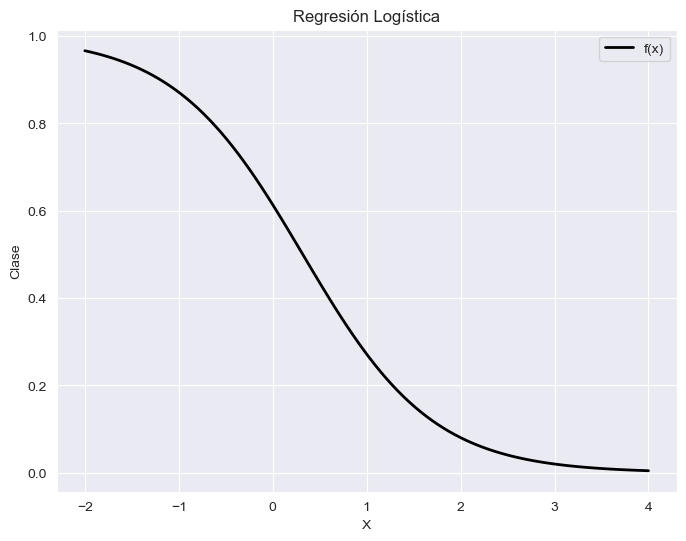

In [8]:
#@title Gráfico
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8,6))
#plt.scatter(X, y, color=['red' if i==1 else 'blue' for i in y], alpha=0.5)
plt.plot(x_range, y_proba, color='black', linewidth=2, label='f(x)')
#plt.axhline(y=0.5, color='green', linestyle='--', label='p=0.5')
#ax.contourf(x_grid, y_grid, z_predict.reshape(x_grid.shape), alpha=0.2, cmap='coolwarm')
#plt.plot(x_range, y_decision, color='green', linewidth=2, label='decisión')
plt.xlabel('X')
plt.ylabel('Clase')
plt.title('Regresión Logística')
plt.legend()
plt.show()

### Ejemplo: Dataset Breast Cancer Detection
Veamos un ejemplo de cómo utilizar la [regresión logística en scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) para el dataset de [Detección de cancer de mama](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data):


Descripción del dataset:

Se calculan diez características de valor real para cada núcleo celular:

* radio
* textura
* perímetro
* área
* suavidad
* compacidad
* concavidad
* puntos cóncavos
* simetría
* dimensión fractal

Se calculan el promedio, el error estándar y el "peor" o el más grande (promedio de los tres valores más grandes) de estas características para cada imagen, lo que resulta en 30 características. 

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# cargar el conjunto de datos
data = load_breast_cancer()

# dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(455, 30)

In [17]:
# crear el modelo de regresión logística
model = LogisticRegression(penalty="none", max_iter=10000)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 98.25%


In [18]:
model.intercept_

array([40.99043014])

In [19]:
model.coef_

array([[ 1.33750572e+00, -9.34197882e-02,  2.93725849e-01,
        -2.56234108e-02, -2.35528969e+01,  1.61818747e+01,
        -2.86759746e+01, -5.42025942e+01,  9.77403252e+00,
         4.25237130e+00, -3.20210508e+00,  2.70382999e+00,
         9.36179103e-01, -3.26897804e-01, -8.02728490e+00,
         4.40495667e+01,  6.13275085e+01, -3.48173132e+00,
         1.33136454e+01,  7.81170461e+00, -1.02066228e+00,
        -6.43537191e-01, -4.38299662e-02, -3.00507252e-03,
        -5.45103367e+01,  1.78528220e+01, -1.66954894e+01,
        -6.87763847e+01, -2.69729146e+01,  9.16347971e+00]])

In [20]:
model.coef_.shape

(1, 30)

Notar que ahora tenemos un coeficiente por cada atributo.

## Support Vector Machines (SVM)

Los modelos de SVM (**Máquinas de Vectores de Soporte**) son un conjunto de algoritmos de aprendizaje supervisado utilizados para la clasificación y regresión. El modelo de SVM se basa en la idea de encontrar el hiperplano que mejor separa los datos de diferentes clases. Este hiperplano es definido por un conjunto de vectores de soporte, que son los puntos más cercanos a la frontera de decisión.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

El modelo de SVM se puede representar matemáticamente de la siguiente manera:

Para el caso de clasificación binaria, el objetivo es encontrar el hiperplano que mejor separa los datos de dos clases. Dado un conjunto de entrenamiento ${(\mathbf{x}_1, y_1),...,(\mathbf{x}_m, y_m)}$, donde $\mathbf{x}_i \in \mathbb{R}^n$ es el vector de características del $i$-ésimo ejemplo y $y_i \in {-1, 1}$ es su correspondiente etiqueta de clase, el hiperplano que mejor separa los datos se puede encontrar resolviendo el siguiente problema de optimización:

$\min_{\mathbf{w}, b} \frac{1}{2}||\mathbf{w}||^2$

sujeto a $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ para todo $i=1,...,m$

La función objetivo es una medida de la complejidad del modelo, mientras que las restricciones aseguran que el hiperplano separa los datos de las dos clases de manera correcta. Podemos usar su implementación [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) de la librería scikit-learn para implementar SVM.

In [21]:
from sklearn.svm import SVC

# crear el modelo SVM
model = SVC(kernel='linear', C=1, random_state=42)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 95.61%


## K-Vecinos más Cercanos (KNN)

El modelo de **K-Nearest Neighbors (KNN)** es un algoritmo de aprendizaje supervisado utilizado para clasificación y regresión. La idea principal del KNN es encontrar las $k$ observaciones más cercanas a la observación de prueba en el espacio de características y utilizar su etiqueta para predecir la clase de la observación de prueba. La distancia entre las observaciones se calcula utilizando una métrica de distancia, como la distancia Euclidiana o la distancia Manhattan. 

---
*Nota:*
La ecuación para la distancia Euclidiana entre dos vectores de observaciones $x$ y $y$ es: $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$, también conocida como norma o distancia $L^2$.

---

Para predecir la clase $\hat{y}^*$ de una observación $x^*$, se utiliza el voto mayoritario de las $k$ observaciones más cercanas a la observación de prueba $x^*$ dentro del conjunto de entrenamiento. La ecuación para la clasificación de KNN es:

$\hat{y}^* = \underset{c}{\operatorname{argmax}}\sum_{i=1}^{k}w_{i}\cdot I(y_{i}=c)$

donde $c$ es una de las posibles clases, $w_i$ es el peso asignado a la $i$-ésima observación cercana (tipicamente 1 o 1/distancia) e $I(y_i = c)$ es una función indicadora que toma el valor 1 si la etiqueta de la $i$-ésima observación cercana es igual a $c$ y 0 en caso contrario.

Para implementar [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) en Python utilizando la librería scikit-learn, podemos utilizar la clase `KNeighborsClassifier`. 

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# crear el modelo de KNN con k=5
model = KNeighborsClassifier(n_neighbors=5)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 95.61%


¿Qué ocurre al cambiar la cantidad de vecinos?

In [24]:
x = range(2,30)
y = []
for i in x:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'accuracy_score')

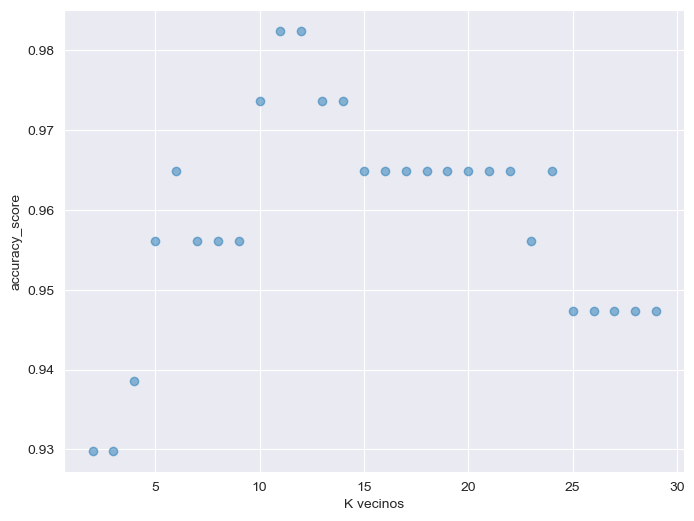

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('K vecinos')
plt.ylabel('accuracy_score')

## Naive Bayes

El modelo de **Naive Bayes** es un algoritmo de aprendizaje supervisado utilizado para la clasificación. Este modelo se basa en el teorema de Bayes, que establece la probabilidad condicional de un evento dado otro evento relacionado. 

---
*Nota:*
La fórmula del Teorema de Bayes es:

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Donde $A$ y $B$ son dos eventos, $P(A|B)$ es la probabilidad posterior de $A$ dado $B$, $P(B|A)$ es la probabilidad de $B$ dado $A$, $P(A)$ es la probabilidad previa de $A$ y $P(B)$ es la probabilidad previa de $B$.

---

El modelo de Naive Bayes es rápido, simple y puede ser muy preciso en muchos casos, especialmente cuando el número de variables predictoras es grande. En el caso de la clasificación, el modelo de Naive Bayes utiliza la probabilidad condicional de una clase dada las características de una observación. 

![alt text](https://present5.com/presentation/24894f6ea1f629fbcc529b6179ea87f7/image-25.jpg)

*El modelo de Naive Bayes asume que todas las características son independientes entre sí, lo que significa que la presencia o ausencia de una característica no está relacionada con la presencia o ausencia de otra característica*. Esta suposición simplifica el cálculo de la probabilidad condicional de una clase dada las características de una observación y permite que el modelo sea entrenado de manera eficiente.

La ecuación para el modelo de Naive Bayes nos permite hacer lo siguiente:

$P(y|x_1, x_2, ..., x_n) = \frac{P(x_1, x_2, ..., x_n|y)P(y)}{P(x_1, x_2, ..., x_n)}$

Donde $P(y|x_1, x_2, ..., x_n)$ es la probabilidad de que una observación pertenezca a la clase de $y$ dado las características $x_1, x_2, ..., x_n$ de la observación. $P(x_1, x_2, ..., x_n|y)$ es la probabilidad condicional de las características dadas la clase, $P(y)$ es la probabilidad previa de la clase, y $P(x_1, x_2, ..., x_n)$ es la probabilidad marginal de las características.

Por ejemplo en nuestro dataset los valores de $x_i$ seran las columnas de nuestro dataset, es decir `X_train`



In [ ]:
X_train

array([[9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [2.109e+01, 2.657e+01, 1.427e+02, ..., 2.903e-01, 4.098e-01,
        1.284e-01],
       [9.173e+00, 1.386e+01, 5.920e+01, ..., 5.087e-02, 3.282e-01,
        8.490e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

Naive Bayes lo que hace en el fondo es calcular una distribuciòn gaussiana para cada clase, asumiendo independencia probabilistica entre clases. La idea es que dado un dato, calculemos $p(x|c_k)$ para cada clase $c_k$. Ahora bien, si son distribuciones univariadas el cálculo es sencillo, pero que pasa si X tiene muchas dimensiones. En ese caso tendremos:

$p(x_1,x_2,...,x_n|c_k)$, y deberemos estimar el vector de medias y la matriz de covarianza. Como, para simplificar el problema, asumimos que las variables x son independientes, nos queda:

$p(x_1,x_2,...,x_n|c_k) = p(x_1|c_k)p(x_2|c_k)...p(x_n|c_k)$

Es decir, podemos modelar cada atributo como una distribución normal univariada y luego multiplicar los likelihoods resultantes, lo cual hace mucho más sencillo el problema.

Finalmente lo que hacemos para predecir dado un dato nuevo es calcular la probabilidad para cada clase y asignar la mas probable.

Si quieren profundizar en este modelo les recomendamos esta referencia: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote05.html


En Python, podemos usar la clase [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) de scikit-learn para implementar el modelo de Naive Bayes para clasificación de datos numéricos. 

In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 97.37%


# Métricas

### Función de Pérdida y Cross-Entropy

La **función de pérdida** es la función $J$ que depende de los parámetros de nuestro modelo ($\theta$) y mide la distancia de las predicciones de nuestro modelo a los datos reales y que nos permite optimizar los parametros. En el caso de la regresión logística la función de pérdida que se utiliza es la función de **entropía cruzada (cross-entropy)**, que se define como:

$ J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) $

donde $N$ es el número de ejemplos de entrenamiento, $y^{(i)}$ es la variable categórica binaria verdadera, $x^{(i)}$ es el vector de características del ejemplo $i$, y $h_\theta(x^{(i)})$ es la predicción del modelo para la observación $i$.

También se la conoce como `log_loss` como en [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss) y puede ser usada en el caso multiclase.

 Veamos la aplicación de esta métrica al caso que vimos más arriba Regresión Logística sobre el Dataset Breast Cancer Detection

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# crear el modelo de regresión logística
model = LogisticRegression(penalty="none", max_iter=10000)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

loss = log_loss(y_test, y_pred)
print('Log loss:', loss)

Log loss: 0.9089362103247608


## Matriz de confusión

Analogamente, se puede calcular la [matriz de confusión CM](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), donde 

$$CM_{i,j} = \text{# de observables en el grupo i que fueron detectados en el grupo j }$$

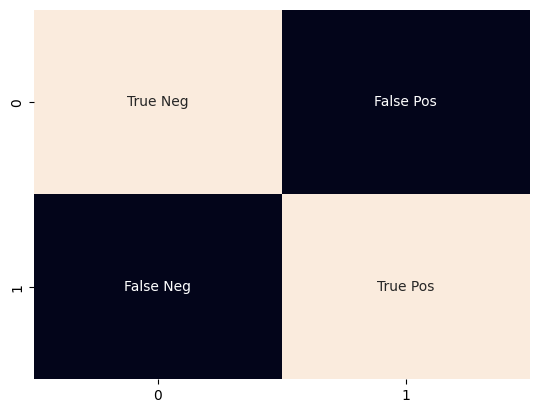

In [ ]:
#@title  Matriz de confusion en el caso binario
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(np.array([[1,0],[0,1]]), annot=labels, fmt='', cbar=False);

In [29]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(C)

Confusion matrix:
[[40  3]
 [ 0 71]]


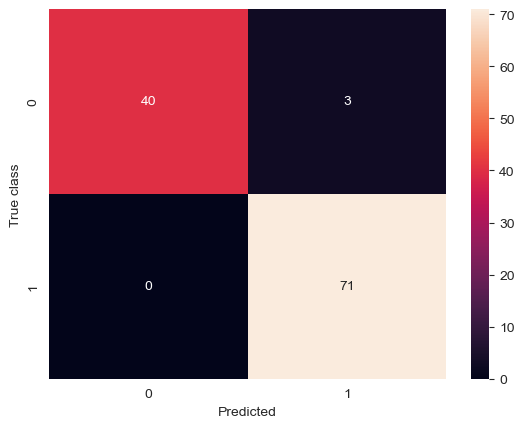

In [30]:
# Con seaborn podemos verla asi
s= sns.heatmap(C, annot=True)
s.set(xlabel='Predicted', ylabel='True class');

## F-Score


### F1 (caso binario)
Por otro lado, el [F-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) en el caso binario se define como

$$F1 = 2 * (precision * recall) / (precision + recall)
$$

Se calcula a partir de la precision y el recall del modelo, donde la precision es el número de resultados verdaderos positivos dividido por el número de todos los resultados positivos, incluyendo aquellos que no se identificaron correctamente, y el recall es el número de resultados verdaderos positivos dividido por el número de todas las muestras que deberían haberse identificado como positivas. 

El valor más alto posible de un puntaje F es 1, lo que indica un precision y recall perfectos, y el valor más bajo posible es 0, si el precision o el recall son cero.




In [31]:
# f1_score nos devuelve la metrica para cada posible elección de clase positiva
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.96385542, 0.97931034])

### Caso multiclase

En este caso tendremos tantos valores de precision y recall como clases tengamos, por lo tanto podremos calcular f1 de [distintas maneras](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f). Pueden usar la funcion [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para obtener un resumen de estas metricas vistas.

# Clasificación Multiclase

La clasificación puede separarse en:

**Clasificación binaria**

Cuando solo hay dos categorías para clasificar puntos de datos, se conoce como clasificación binaria. Por ejemplo, detectar si un paciente tiene tuberculosis (1) o no la tiene (0), o clasificar si una crítica de cine es positiva (1) o negativa (0).

**Clasificación multiclase**

Cuando el número de clases es mayor que dos, se conoce como clasificación multiclase. Por ejemplo, si tenemos que identificar el dígito en una imagen y clasificarlo en cualquier valor entre 0 y 9. En este caso, tenemos 10 clases. También podemos tener que calificar canciones entre 1 y 5 en base a su popularidad. En estos casos, cada punto de datos se asigna a una única etiqueta de clase.

**Clasificación multi-etiqueta**

Una sola entrada de datos puede tenes varias etiquetas asociadas. Por ejemplo, en la detección de objetos en imágenes, una imagen puede tener una casa y una planta. Esto se llama clasificación multi-etiqueta.

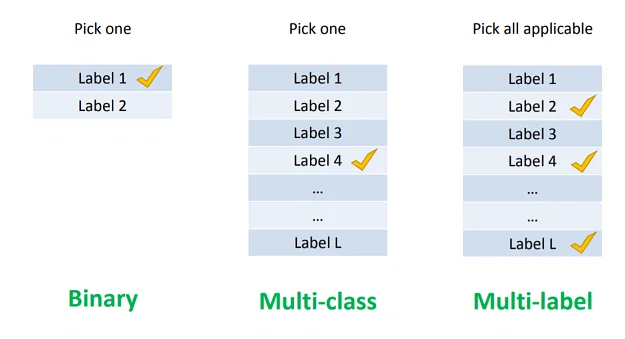

Los algoritmos utilizados para la clasificación multiclase se pueden categorizar principalmente en las siguientes categorías:

* Transformación binaria

* Clasificador nativo de múltiples clases (Ej: Naive Bayes, KNN)

* Clasificación jerárquica

**Transformación binaria**

Existen algoritmos diseñados solo para tareas de clasificación binaria como la regresión logística y las máquinas de vectores de soporte (SVM). En el caso de multiclase, la tarea se divide en múltiples problemas de clasificación binaria utilizando estrategias como uno contra todos (one-vs-rest) y uno contra uno (one-vs-one) para utilizarlos en la clasificación multiclase.


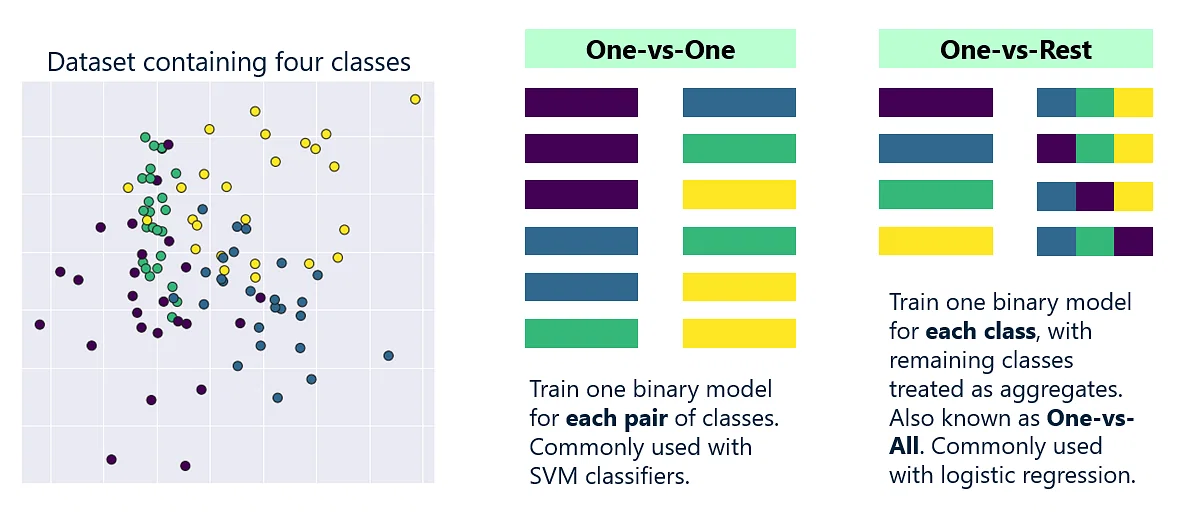

**Uno contra el resto (One-vs-Rest)**

Como su nombre indica, se entrena un clasificador binario para cada clase, donde la distribución de clases es la clase objetivo frente al resto de las clases.

Por ejemplo, si se está trabajando en un problema para predecir si la fruta dada es una manzana, pera o banana, se entrenarán tres clasificadores binarios.

* Clasificador A: [manzana] frente a [pera, banana]

* Clasificador B: [pera] frente a [manzana, bana]

* Clasificador C: [banana] frente a [manzana, pera]

Se utiliza el voto para predecir la clase final, es decir, el clasificador binario que predice la clase objetivo con la mayor confianza se da como salida final y se utiliza comúnmente con la regresión logística.

**Uno contra uno (One-vs-One)**

En este enfoque, se entrena un clasificador binario para cada par de clases, es decir, una clase frente a cada otra clase. El número de clasificadores binarios que se deben entrenar se puede calcular con la ayuda de esta fórmula sencilla:

(N * (N-1))/2 donde N = número total de clases

Por ejemplo, tomando el modelo anterior, los clasificadores totales que se deben entrenar son tres, que son los siguientes:

* Clasificador A: manzana frente a pera

* Clasificador B: manzana frente a banana

* Clasificador C: pera frente a banana

Cada clasificador binario predice una clase, y la clase predicha por la mayoría de los clasificadores se da como predicción final de clase. Esta estrategia funciona mejor para SVM u otros algoritmos basados en núcleos.

Probemos utilizar la regresión logística en una variable contra el resto. 

Accuracy: 0.9333333333333333


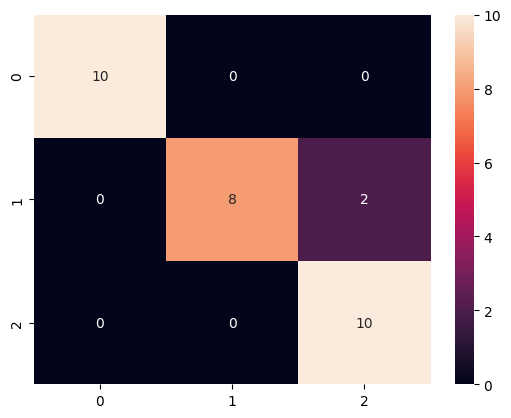

In [ ]:
# importando las bibliotecas necesarias
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
  
# cargando el conjunto de datos de iris
iris = datasets.load_iris()
  
# X -> atributos, y -> etiquetas
X = iris.data
y = iris.target
  
# dividiendo X, y en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size=0.8, test_size=0.2, stratify=y)

# usar regresión logística para la clasificación
classifier = LogisticRegression(multi_class = "ovr")

# ajustar el modelo para los datos de entrenamiento
classifier.fit(X_train, y_train)
# predecir la variable y para los datos de testeo
prediction_y = classifier.predict(X_test)

# comprobar la precisión del modelo
print("Accuracy:", end=' ')
print(np.sum(prediction_y == y_test) / float(len(y_test)))

# creando una matriz de confusión
cm = confusion_matrix(y_test, prediction_y)
sns.heatmap(cm, annot=True);

## OneVsRest Classifier
**OneVsRestClassifier** de Scikit-Learn es una estrategia de clasificación multiclase que se basa en entrenar varios clasificadores binarios para discriminar entre cada clase y el resto de las clases. Es decir, si tenemos un problema de clasificación multiclase con N clases, se entrenarán N clasificadores binarios. Durante la predicción, cada uno de los clasificadores binarios vota por la clase que está intentando discriminar y la clase que recibe la mayoría de votos es la que se predice como la clase final.

Accuracy: 0.9333333333333333


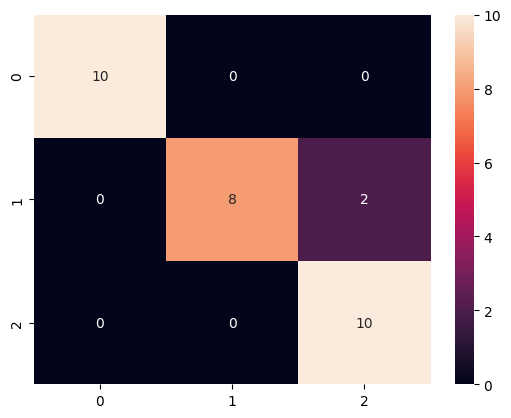

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
prediction_y = classifier.predict(X_test)

# comprobar la precisión del modelo
print("Accuracy:", end=' ')
print(np.sum(prediction_y == y_test) / float(len(y_test)))

# creando una matriz de confusión
cm = confusion_matrix(y_test, prediction_y)
sns.heatmap(cm, annot=True);

## OneVsOne Classifier 
**OneVsOneClassifier** de Scikit-Learn es una estrategia de clasificación multiclase que se basa en entrenar varios clasificadores binarios para discriminar entre todas las posibles combinaciones de dos clases. Es decir, si tenemos un problema de clasificación multiclase con N clases, se entrenarán $N(N-1)/2$ clasificadores binarios. Durante la predicción, cada uno de los clasificadores binarios vota por una de las dos clases que está intentando discriminar y la clase que recibe la mayoría de votos es la que se predice como la clase final.

Accuracy: 0.9666666666666667


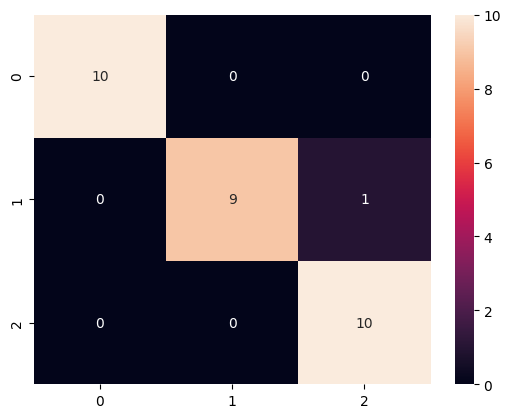

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

classifier = OneVsOneClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
prediction_y = classifier.predict(X_test)

# comprobar la precisión del modelo
print("Accuracy:", end=' ')
print(np.sum(prediction_y == y_test) / float(len(y_test)))

# creando una matriz de confusión
cm = confusion_matrix(y_test, prediction_y)
sns.heatmap(cm, annot=True);

---
# Balance de clases
En este caso trabajamos con un conjunto de **datos balanceado**, es decir que cada clase aparece aproximadamente la misma cantidad de veces. Esto no sucede en la mayoria de casos reales y en esos casos es necesario hacer algo para balancear los datos y/o para corregir las metricas. Algunas metricas son mas sensibles que otras a este desbalance, por lo que la elecciòn de la misma es importante. Otros casos, los mismos modelos implementan metodos para corregir el modelo y el desbalance. Veremos en la proxima clase un poco mas sobre este tema.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



---
# Ejercicios

Responda las siguientes preguntas para cada uno de los modelos vistos hoy utilizando el material visto en clase y recurriendo a la documentación de los modelos en scikit-learn:

* ¿El modelo se puede utilizar para ambos problemas: clasificación binario y multiclase?
* ¿El modelo implementa algún método o hiperparámetro para trabajar con el desbalance de clases?
* ¿El modelo implementa algún método o hiperparámetro al cuál la documentación se refiera como "*regularización*"?




### Ejercicio de programacion

Entrenar un algoritmo de cada uno de los vistos en esta clase para trabajar alguno de los siguientes datasets (si tienen muuuuchas ganas hagan todos):

- [Iris Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset)

- [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


In [124]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = load_iris()


## Exploration

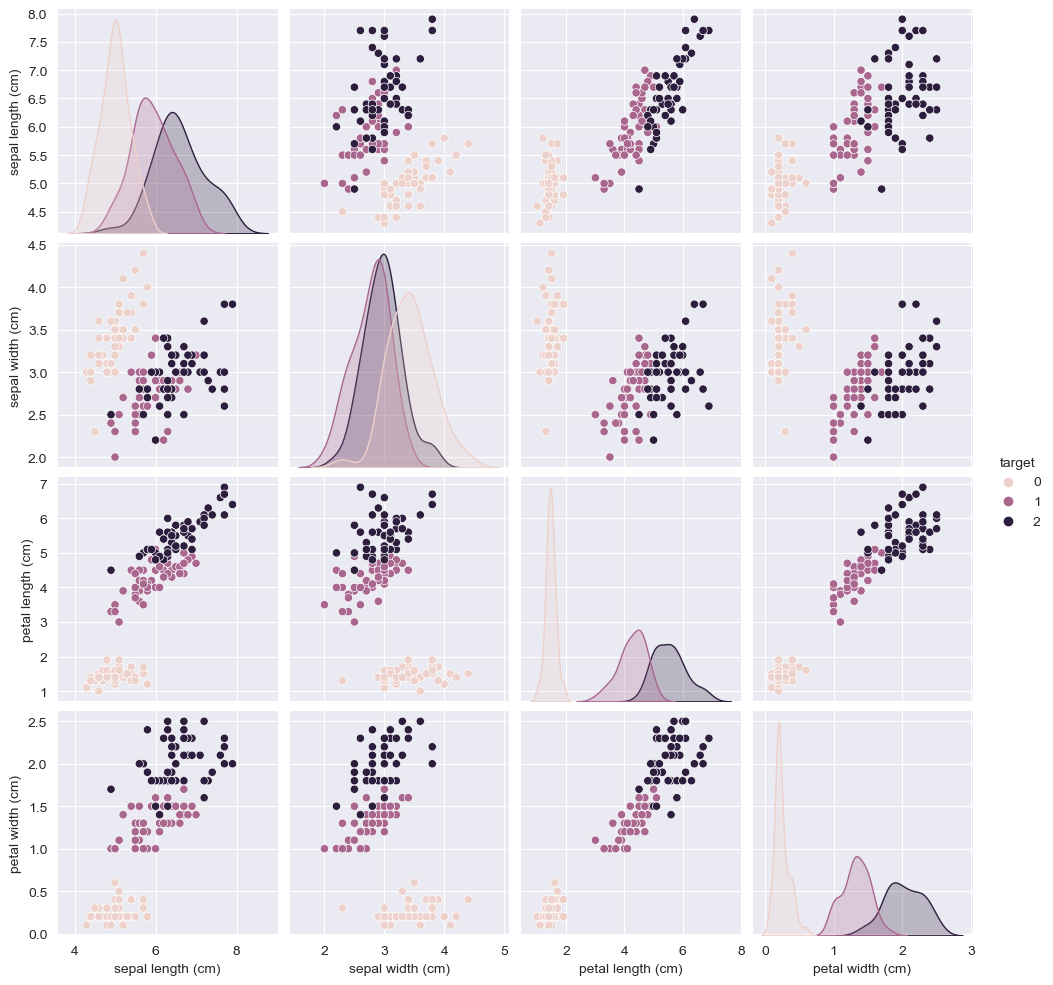

In [138]:
X, y = load_iris(return_X_y=True)
iris = pd.concat([pd.DataFrame(X, columns=df.feature_names), pd.DataFrame(y, columns= ["target"])], axis=1)
iris.describe()
sns.pairplot(iris, hue="target")

## Feature selection

In [139]:
X = X[:,[2,3]] # me quedo unicamente con petal length y petal width


## splitting dataset

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8, random_state=123)

## Logit

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



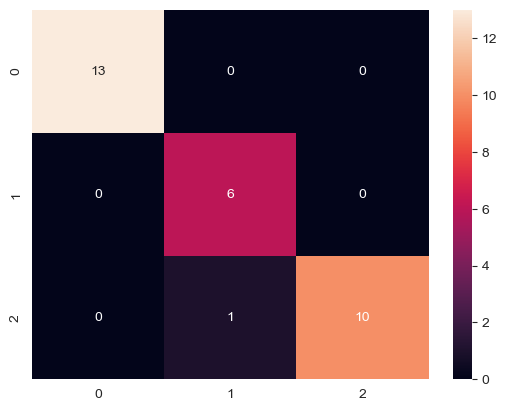

In [129]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

classifier = OneVsOneClassifier(LogisticRegression(penalty="none", max_iter=10000))
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# comprobar la precisión del modelo
print(f"Accuracy: {np.sum(y_pred == y_test) / float(len(y_test))}")

# creando una matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## SVM

Accuracy de la clasificación: 36.70%
Accuracy: 1.0


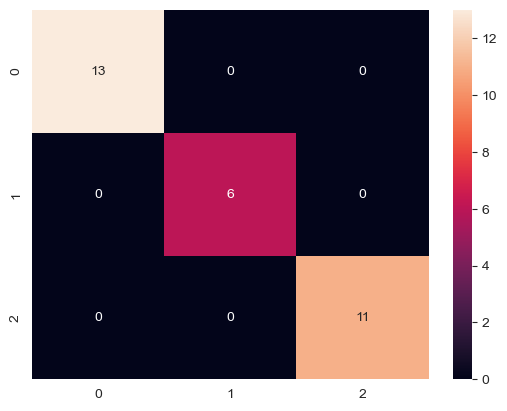

In [130]:
from sklearn.svm import SVC

print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

classifier_svm = OneVsOneClassifier(SVC(kernel='linear', C=1, random_state=42))
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)

# comprobar la precisión del modelo
print(f"Accuracy: {np.sum(y_pred == y_test) / float(len(y_test))}")

# creando una matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);



# KNN

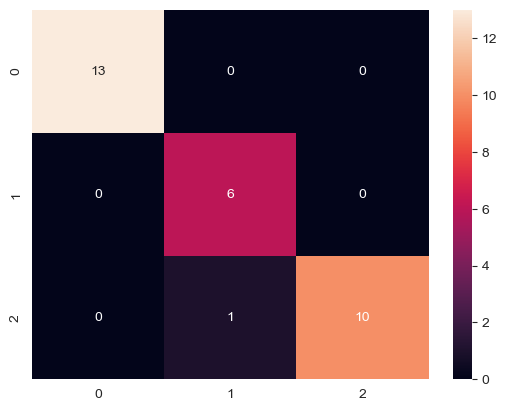

In [133]:
from sklearn.neighbors import KNeighborsClassifier

model = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=5))

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

1) Separar los datos aleatoriamente en 2 conjuntos: entrenamiento y evaluación utilizando las proporciones fernet-cola rebajado (80-20). Se puede utilizar la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) de scikit-learn. Investigar el efecto del parámetro stratify. ¿Que hace? ¿Es necesario en nuestros datos? Realice gráficos para justificar su respuesta.## Class unbalnce

In [38]:

X_train, X_test, y_train_str, y_test_str = train_test_split(X,y,train_size=.8, random_state=123, stratify=y)

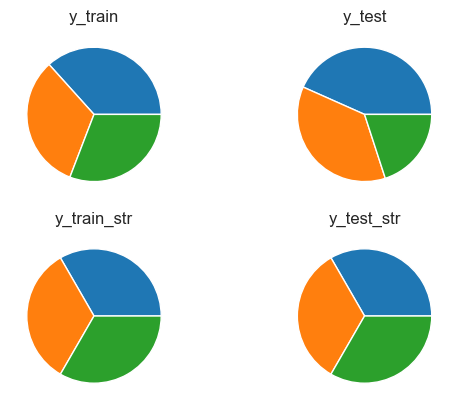

In [45]:
fig, ax = plt.subplots(2,2)
ax[0,0].pie(pd.DataFrame(y_train).value_counts())
ax[0,0].set_title("y_train")
ax[0,1].pie(pd.DataFrame(y_test).value_counts())
ax[0,1].set_title("y_test")
ax[1,0].pie(pd.DataFrame(y_train_str).value_counts())
ax[1,0].set_title("y_train_str")
ax[1,1].pie(pd.DataFrame(y_test_str).value_counts())
ax[1,1].set_title("y_test_str");

El dataset no pareciera estar lo suficientemente desbalanceado como para necesitar forzar su balance

2) Elegir un hiperparámetros para cada modelo (salvo en Naive Bayes) y definir una grilla para ese hiperparametro. Elija el mejor valor de dicho hiperparametro utilizando Cross Validation en el conjunto de entrenamiento para F1-Macro. Una vez elegido ese mejor modelo, reentrene el modelo en todo el conjunto de entrenamiento. *Hint:* Puede ser de utilidad utilizar la funcion [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


### Gid search


In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

logit_params={'estimator__penalty': ['none', 'l2'], 'estimator__C': [x for x in np.linspace(0.1,100,25)]}
svm_params={"estimator__kernel": ["linear", "rbf"]}
knn_params={"estimator__n_neighbors": [x for x in range(1,20,2)]}

### models

In [230]:
lista=[]
#logit
logit_model = OneVsOneClassifier(LogisticRegression())
logit_grid = GridSearchCV(logit_model, param_grid=logit_params, cv=5, scoring='f1_macro')
logit_grid.fit(X_train, y_train)
y_pred_logit =  logit_grid.predict(X_test)
logit_f1_macro = f1_score(y_test, y_pred_logit, average="macro")
logit_accuracy = accuracy_score(y_test, y_pred_logit)

rtdo_modelo = {"model": "logit",
               "f1": logit_f1_macro,
               "accuracy": logit_accuracy
              }

lista.append(rtdo_modelo)

#inicializo mejor modelo
max_score = logit_f1_macro
best_model = logit_grid.best_estimator_

# SVM
svm_model = OneVsOneClassifier(SVC(C=1, random_state=42))
svm_grid = GridSearchCV(svm_model, param_grid=svm_params, cv=5, scoring='f1_macro')
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.predict(X_test)
svm_f1_macro = f1_score(y_test, y_pred_svm, average="macro")
svm_accuracy = accuracy_score(y_test, y_pred_svm)


rtdo_modelo = {"model": "svm",
               "f1": svm_f1_macro,
               "accuracy": svm_accuracy
              }

lista.append(rtdo_modelo)



#evaluo mejor modelo
if svm_f1_macro > max_score:
    max_score = svm_f1_macro
    best_model = svm_grid.best_estimator_


#knn
knn_model = OneVsOneClassifier(KNeighborsClassifier())
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='f1_macro')
knn_grid.fit(X_train, y_train)
y_pred_knn = knn_grid.predict(X_test)
knn_f1_macro = f1_score(y_test, y_pred_knn, average="macro")
knn_accuracy = accuracy_score(y_test, y_pred_logit)

rtdo_modelo = {"model": "knn",
               "f1": knn_f1_macro,
               "accuracy": knn_accuracy
              }

lista.append(rtdo_modelo)


mejores_modelos  = pd.DataFrame.from_dict(lista).sort_values("f1", ascending=True)

#evaluo mejor modelo de todos
if knn_f1_macro > max_score:
    max_score = svm_f1_macro
    best_model = knn_grid.best_estimator_


eval = {"logit_grid": logit_f1_macro,
        "svm_grid": svm_f1_macro,
        "knn_grid": knn_f1_macro
              }


print(f"{max(eval, key=eval.get)} con F1 macro= {eval[max(eval, key=eval.get)]}")



C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting 

ValueError: 'auc' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [225]:

best_model.fit(X_train, y_train)

y_pred_final_model = final_model.predict(X_test)
best_model_f1_macro = f1_score(y_test, y_pred_final_model, average="macro")
print(f"f1-macro score para el mejor modelo es {best_model_f1_macro}")

f1-macro score para el mejor modelo es 1.0



3) Analizar el `accuracy_score` que se obtiene para los distintos modelos en el conjunto de test. Realizar un grafico en el cual se observen los valores de accuracy y F1 score macro para cada mejor modelo encontrado.


,model,f1,accuracy
2,knn,0.958486,1.0
0,logit,1.000000,1.0
1,svm,1.000000,1.0


<AxesSubplot:xlabel='accuracy', ylabel='f1'>

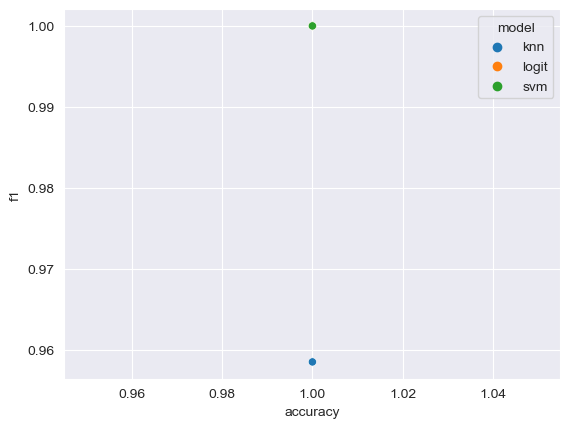

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
display(mejores_modelos)
sns.scatterplot(data= mejores_modelos, x="accuracy", y="f1", hue="model")



(*=adicionales)

4*) Investigar el clasificador [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html?highlight=radius%20classifier#sklearn.neighbors.RadiusNeighborsClassifier). Ajuste un modelo de este estilo y comparelo con el resto.

5*) Investigar el clasificador [Linear Discriminant Analysis](https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html). Ajuste un modelo de este estilo y comparelo con el resto.

6*) Investigar la métrica [$F$-beta](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html). ¿Que efecto tiene el parámetro beta?